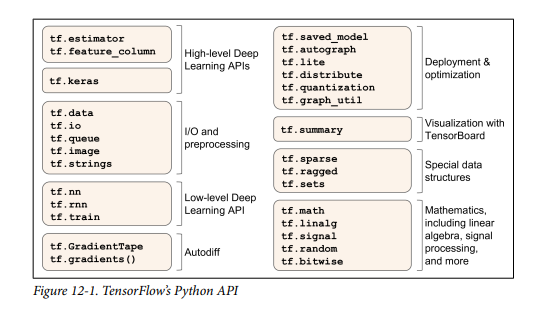

# Tensors and Operations

In [1]:
import numpy as np 
import tensorflow as tf
from tensorflow import keras
assert tf.__version__ >= "2.0"

In [2]:
tf.constant([[1.0, 2.0, 3.0], [4.0, 5.0, 6.0]])

2022-12-09 17:53:42.653402: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[1., 2., 3.],
       [4., 5., 6.]], dtype=float32)>

In [3]:
tf.constant(42)

<tf.Tensor: shape=(), dtype=int32, numpy=42>

In [4]:
t = tf.constant([[1.0, 2.0, 3.0], [4.0, 5.0, 6.0]])
t.shape

TensorShape([2, 3])

In [5]:
t.dtype

tf.float32

In [6]:
t[: , 1:]

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[2., 3.],
       [5., 6.]], dtype=float32)>

In [7]:
t[: , 1, tf.newaxis]

<tf.Tensor: shape=(2, 1), dtype=float32, numpy=
array([[2.],
       [5.]], dtype=float32)>

In [8]:
t + 10

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[11., 12., 13.],
       [14., 15., 16.]], dtype=float32)>

In [9]:
tf.square(t)

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[ 1.,  4.,  9.],
       [16., 25., 36.]], dtype=float32)>

In [10]:
t @ tf.transpose(t)

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[14., 32.],
       [32., 77.]], dtype=float32)>

# Tensors and NumPy

In [11]:
a = np.array([1.0, 2.0, 3.0])
tf.constant(a)

<tf.Tensor: shape=(3,), dtype=float64, numpy=array([1., 2., 3.])>

In [12]:
t.numpy()

array([[1., 2., 3.],
       [4., 5., 6.]], dtype=float32)

In [13]:
tf.square(a)

<tf.Tensor: shape=(3,), dtype=float64, numpy=array([1., 4., 9.])>

In [14]:
np.square(t)

array([[ 1.,  4.,  9.],
       [16., 25., 36.]], dtype=float32)

# Type Conversions

In [15]:
# tf.constant(2.0) + tf.constant(40)     # no type conversions
tf.constant(2.0) + tf.cast(tf.constant(40), tf.float32)

<tf.Tensor: shape=(), dtype=float32, numpy=42.0>

# Variables

In [16]:
v = tf.Variable([[1.0, 2.0, 3.0], [4.0, 5.0, 6.0]])
v

<tf.Variable 'Variable:0' shape=(2, 3) dtype=float32, numpy=
array([[1., 2., 3.],
       [4., 5., 6.]], dtype=float32)>

In [17]:
v.assign(2 * v)

<tf.Variable 'UnreadVariable' shape=(2, 3) dtype=float32, numpy=
array([[ 2.,  4.,  6.],
       [ 8., 10., 12.]], dtype=float32)>

In [18]:
v[0, 1].assign(42)

<tf.Variable 'UnreadVariable' shape=(2, 3) dtype=float32, numpy=
array([[ 2., 42.,  6.],
       [ 8., 10., 12.]], dtype=float32)>

In [19]:
v[:, 2].assign([0.0, 1.0])

<tf.Variable 'UnreadVariable' shape=(2, 3) dtype=float32, numpy=
array([[ 2., 42.,  0.],
       [ 8., 10.,  1.]], dtype=float32)>

In [20]:
v.scatter_nd_update(indices=[[0, 0], [1, 2]],
                    updates=[100., 200.])

<tf.Variable 'UnreadVariable' shape=(2, 3) dtype=float32, numpy=
array([[100.,  42.,   0.],
       [  8.,  10., 200.]], dtype=float32)>

# Other Data Structures

> Sparse Tensors (tf.SparseTensor)

> Tensor Arrays (tf.TensorArray)

> Ragged Tensors (tf.RaggedTensor)

> Srtring Tensors (tf.string: byte strings, tf.strings: byte + unicode strings)

> Sets (tf.sets)

> Queue (tf.queue)

# Custom Loss Functions

In [21]:
def huber_fn(y_true, y_pred):
    error = y_true - y_pred
    is_small_error = tf.abs(error) < 1
    squared_loss = tf.square(error) / 2
    linear_loss = tf.abs(error) - 0.5
    return tf.where(is_small_error, squared_loss, linear_loss) # if small_error then squareloss else linearloss

In [22]:
huber_fn(tf.Variable(1.0), tf.Variable(0.5))

<tf.Tensor: shape=(), dtype=float32, numpy=0.125>

In [23]:
# model.compile(loss=huber_fn)

# Saving + Loading
> custom objects need to be defined in custom_objects dict

In [24]:
# model = keras.models.load_model("test.h5", custom_objects={'huber_fn':huber_fn})

In [25]:
def create_huber(threshold=1.0):
    def huber_fn(y_true, y_pred):
        error = y_true - y_pred
        is_small_error = tf.abs(error) < threshold
        squared_loss = tf.square(error) / 2
        linear_loss = tf.abs(error) - 0.5
        return tf.where(is_small_error, squared_loss, linear_loss)
    return huber_fn

In [26]:
# model.compile(loss=create_huber(2.0))

In [27]:
"""
uses the key as the function it will run

model = keras.models.load_model("test.h5", 
                                 custom_objects={'huber_fn':create_huber(2.0)})
"""

'\nuses the key as the function it will run\n\nmodel = keras.models.load_model("test.h5", \n                                 custom_objects={\'huber_fn\':create_huber(2.0)})\n'

> Better way is to subclass Keras classes.

In [28]:
class HuberLoss(keras.losses.Loss):
    def __init__(self, threshold=1.0, **kwargs): 
        self.threshold = threshold
        super().__init__(**kwargs)
    def call(self, y_true, y_pred):          # loss calc
        error = y_true - y_pred
        is_small_error = tf.abs(error) < self.threshold
        squared_loss = tf.square(error) / 2
        linear_loss  = self.threshold * tf.abs(error) - self.threshold**2 / 2
        return tf.where(is_small_error, squared_loss, linear_loss)
    def get_config(self):                    # setting hyperparameters
        base_config = super().get_config()
        return {**base_config, "threshold": self.threshold}

In [29]:
# model.compile(loss=HuberLoss(2.), optimizer="nadam")

In [30]:
"""
model = keras.models.load_model("test.h5",
                                custom_objects={"HuberLoss": HuberLoss})
"""

'\nmodel = keras.models.load_model("test.h5",\n                                custom_objects={"HuberLoss": HuberLoss})\n'

# Custom Activations, Initializers, Regularizers, Constraints

In [31]:
def my_softplus(z): # return value is just tf.nn.softplus(z)
    return tf.math.log(tf.exp(z) + 1.0)

def my_glorot_initializer(shape, dtype=tf.float32):
    stddev = tf.sqrt(2.0 / (shape[0] + shape[1]))
    return tf.random.normal(shape, stddev=stddev, dtype=dtype)

def my_l1_regularizer(weights):
    return tf.reduce_sum(tf.abs(0.01 * weights))

def my_positive_weights(weights): # return value is just tf.nn.relu(weights)
    return tf.where(weights < 0., tf.zeros_like(weights), weights)

In [32]:
layer = keras.layers.Dense(1, 
                           activation=my_softplus,
                           kernel_initializer=my_glorot_initializer,
                           kernel_regularizer=my_l1_regularizer,
                           kernel_constraint=my_positive_weights)

> if you want hyperparameters saved with custom functions then subclass keras api

In [33]:
class CustomRegularizer(keras.regularizers.Regularizer):
    def __int__(self, factor):
        self.factor = factor
    def __call__(self, weights):          
        return tf.reduce_sum(tf.abs(self.factor * weights))
    def get_config(self):
        return {factor: self.factor}

> "__ call __" for regularizers, initializers, constraints

> "call" for losses layers activations models

# Custom Metrics
> same as losses, can even use the previous huber as a metric

In [34]:
# model.compile(loss="mse", optimizer="nadam", metrics=[create_huber(2.0)])

In [35]:
precision = keras.metrics.Precision()
precision([0, 1, 1, 1, 0, 1, 0, 1], [1, 1, 0, 1, 0, 1, 0, 1])

<tf.Tensor: shape=(), dtype=float32, numpy=0.8>

In [36]:
precision([0, 1, 0, 0, 1, 0, 1, 1], [1, 0, 1, 1, 0, 0, 0, 0])

<tf.Tensor: shape=(), dtype=float32, numpy=0.5>

In [37]:
precision.result()

<tf.Tensor: shape=(), dtype=float32, numpy=0.5>

In [38]:
precision.variables

[<tf.Variable 'true_positives:0' shape=(1,) dtype=float32, numpy=array([4.], dtype=float32)>,
 <tf.Variable 'false_positives:0' shape=(1,) dtype=float32, numpy=array([4.], dtype=float32)>]

> this is a streaming metric, it computes huberloss so far

> update state is called when it is used a fucntion

> result compute final result, ratio of what model predicted so far / the count of instances

* total = 2 * |10 - 2| - 2²/2 = 14
* count = 1
* result = 14 / 1 = 14

> self.total and self.count on ongoing sums

> total is what the model has predicted so far

> count is what it should be

In [39]:
class HuberMetric(keras.metrics.Metric):
    def __init__(self, threshold=1.0, **kwargs):
        super().__init__(**kwargs) # handles base args (e.g., dtype)
        self.threshold = threshold
        self.huber_fn = create_huber(threshold) # uses the previous huber func when called
        self.total = self.add_weight("total", initializer="zeros")
        self.count = self.add_weight("count", initializer="zeros")
    def update_state(self, y_true, y_pred, sample_weight=None):
        metric = self.huber_fn(y_true, y_pred)
        self.total.assign_add(tf.reduce_sum(metric))
        self.count.assign_add(tf.cast(tf.size(y_true), tf.float32))
    def result(self):
        return self.total / self.count
    def get_config(self):
        base_config = super().get_config()
        return {**base_config, "threshold": self.threshold}

# Custom Layers

In [40]:
# lets you apply function to inputs
exponential_layer = keras.layers.Lambda(lambda x: tf.exp(x)) 

> basic implementation of dense layer

> init with neurons and hyperparams

> adds weights with glorot normal distribution, built with shape of the connections from previous layer and units

> last dimension of batch input shape is the number of units in layer

> sets bias == zer0

> call to run activation on x.weights + bias

> compute output returns shape of outputs, it is the shape of inputs with this layers neurons appended (for use in next built layer)


In [41]:
class MyDense(keras.layers.Layer):
    def __init__(self, units, activation=None, kernel_regularizer=None, **kwargs):
        super().__init__(**kwargs)
        self.units = units
        self.activation = keras.activations.get(activation)
        self.kernel_regularizer = kernel_regularizer

    def build(self, batch_input_shape):
        print(batch_input_shape)
        self.kernel = self.add_weight(
            name="kernel", shape=[batch_input_shape[-1], self.units],
            initializer="glorot_normal", regularizer=self.kernel_regularizer)
        self.bias = self.add_weight(
            name="bias", shape=[self.units], initializer="zeros",
            regularizer=self.kernel_regularizer
        )
        super().build(batch_input_shape) # must be at the end

    def call(self, X):
        return self.activation(X @ self.kernel + self.bias)

    def compute_output_shape(self, batch_input_shape):
        print(batch_input_shape)
        return tf.TensorShape(batch_input_shape.as_list()[:-1] + [self.units])

    def get_config(self):
        base_config = super().get_config()
        return {**base_config, "units": self.units,
                "activation": keras.activations.serialize(self.activation),
                "kernel_regularizer": keras.regulizers.serialize(self.kernel_regularizer)}

In [42]:
fashion_minst = keras.datasets.fashion_mnist
(xtf, ytf), (xte, yte) = fashion_minst.load_data()

xt1, xv1 = xtf[:int(xtf.shape[0] * .80)] / 255.0, xtf[int(xtf.shape[0] * .80):] / 255.0
yt1, yv1 = ytf[:int(ytf.shape[0] * .80)] , ytf[int(ytf.shape[0] * .80):]

mydensemod = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    MyDense(30, activation=keras.activations.relu),
    MyDense(30, activation=keras.activations.relu),
    MyDense(10, activation=keras.activations.softmax)
])

mydensemod.compile(
    loss = 'sparse_categorical_crossentropy',
    optimizer = keras.optimizers.SGD(learning_rate=0.01),
    metrics = ['accuracy']
)

4431872/4422102 [==============================] - 0s 0us/step
(None, 784)
(None, 30)
(None, 30)


In [43]:
mydensemod.fit(xt1, yt1, epochs=5, validation_data=(xv1,yv1))

2022-12-09 17:53:46.072607: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.9755 - accuracy: 0.6805 - val_loss: 0.6245 - val_accuracy: 0.7853
Epoch 2/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.5702 - accuracy: 0.8029 - val_loss: 0.5419 - val_accuracy: 0.8127
Epoch 3/5
1500/1500 [==============================] - 2s 2ms/step - loss: 0.4995 - accuracy: 0.8274 - val_loss: 0.4879 - val_accuracy: 0.8289
Epoch 4/5
1500/1500 [==============================] - 2s 2ms/step - loss: 0.4656 - accuracy: 0.8374 - val_loss: 0.4699 - val_accuracy: 0.8338
Epoch 5/5
1500/1500 [==============================] - 2s 2ms/step - loss: 0.4438 - accuracy: 0.8439 - val_loss: 0.4346 - val_accuracy: 0.8493


In [44]:
class MyMultiLayer(keras.layers.Layer):
    def call(self, X):     
        X1, X2 = X    # two inputs
        return [X1 + X2, X1 - X2, X1 * X2]   # three outputs

    def compute_output_shape(self, batch_input_shape): 
        b1, b2 = batch_input_shape   # two inputs
        return [b1, b1, b1]     # three outputs

> adds gaussian noise during training, doesnt during testing

In [45]:
class AddGaussianNoise(keras.layers.Layer):
    def __init__(self, stddev, **kwargs):
        super().__init__(**kwargs)
        self.stddev = stddev

    def call(self, X, training=None):
        if training:
            noise = tf.random.normal(tf.shape(X), stddev=self.stddev)
            return X + noise
        else:
            return X

    def compute_output_shape(self, batch_input_shape):
        return batch_input_shape

# Custom Models
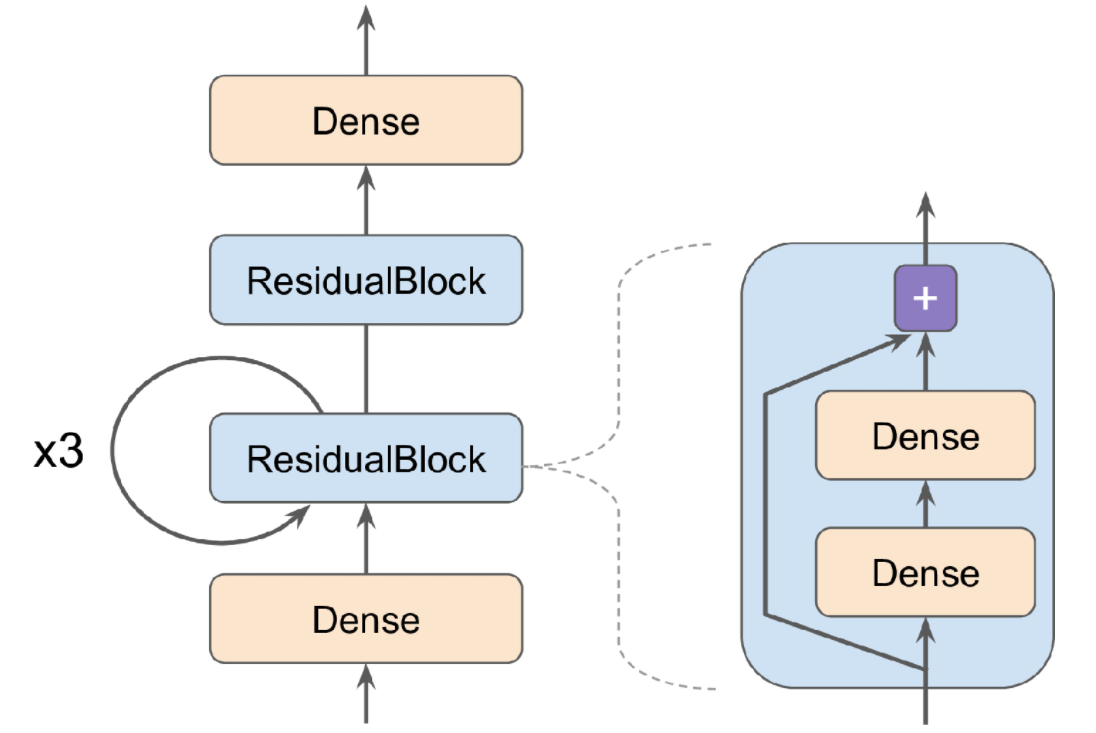

In [46]:
class ResidualBlock(keras.layers.Layer):
    def __init__(self, n_layers, n_neurons, **kwargs):
        super().__init__(**kwargs)
        self.hidden = [keras.layers.Dense(n_neurons, activation="elu",
                                          kernel_initializer="he_normal")
                       for _ in range(n_layers)]

    def call(self, inputs):
        Z = inputs
        for layer in self.hidden:
            Z = layer(Z)
        return inputs + Z

In [47]:
class ResidualRegressor(keras.models.Model):
    def __init__(self, output_dim, **kwargs):
        super().__init__(**kwargs)
        self.hidden1 = keras.layers.Dense(30, activation="elu",
                                          kernel_initializer="he_normal")
        self.block1 = ResidualBlock(2, 30)
        self.block2 = ResidualBlock(2, 30)
        self.out = keras.layers.Dense(output_dim)

    def call(self, inputs):
        Z = self.hidden1(inputs)
        for _ in range(1 + 3):
            Z = self.block1(Z)
        Z = self.block2(Z)
        return self.out(Z)

# Loses and Metrics Based on Model Internals

In [48]:
class ReconstructingRegressor(keras.Model):
    def __init__(self, output_dim, **kwargs):
        super().__init__(**kwargs)
        self.hidden = [keras.layers.Dense(30, activation="selu",
                                          kernel_initializer="lecun_normal")
                       for _ in range(5)]
        self.out = keras.layers.Dense(output_dim)
        self.reconstruction_mean = keras.metrics.Mean(name="reconstruction_error")

    def build(self, batch_input_shape):
        n_inputs = batch_input_shape[-1]
        self.reconstruct = keras.layers.Dense(n_inputs)
        # super().build(batch_input_shape)

    def call(self, inputs, training=None):
        Z = inputs
        for layer in self.hidden:
            Z = layer(Z)
        reconstruction = self.reconstruct(Z)
        recon_loss = tf.reduce_mean(tf.square(reconstruction - inputs))
        self.add_loss(0.05 * recon_loss)
        if training:
            result = self.reconstruction_mean(recon_loss)
            self.add_metric(result)
        return self.out(Z)

# Computing Gradients Using Autodiff

In [49]:
def f(w1, w2):
    return 3 * w1 ** 2 + 2 * w1 * w2

In [50]:
w1, w2 = tf.Variable(5.0), tf.Variable(3.0)
with tf.GradientTape() as tape:
    z = f(w1, w2)
tape.gradient(z, [w1, w2])

[<tf.Tensor: shape=(), dtype=float32, numpy=36.0>,
 <tf.Tensor: shape=(), dtype=float32, numpy=10.0>]

In [51]:
# tape.gradient(z, [w1, w2])  # the tape is automatically erased after .gradient is called so this wouldnt work

In [52]:
with tf.GradientTape(persistent=True) as tape:
    z = f(w1, w2)
tape.gradient(z, w1)

<tf.Tensor: shape=(), dtype=float32, numpy=36.0>

In [53]:
tape.gradient(z, w2)

<tf.Tensor: shape=(), dtype=float32, numpy=10.0>

In [54]:
del tape

In [55]:
# can only track variables, can force it to watch any tensor
c1, c2 = tf.constant(5.0), tf.constant(3.0)
with tf.GradientTape() as tape:
    tape.watch(c1)
    tape.watch(c2)
    z = f(c1, c2)
tape.gradient(z, [c1, c2])

[<tf.Tensor: shape=(), dtype=float32, numpy=36.0>,
 <tf.Tensor: shape=(), dtype=float32, numpy=10.0>]

In [56]:
def f(w1, w2):
    return 3 * w1 ** 2 + tf.stop_gradient(2 * w1 * w2)

with tf.GradientTape() as tape:
    z = f(w1, w2)
    
tape.gradient(z, [w1, w2])

[<tf.Tensor: shape=(), dtype=float32, numpy=30.0>, None]

In [57]:
x = tf.Variable([100.0])

with tf.GradientTape() as tape:
    z = my_softplus(x)             # inf/ inf == nan
    
tape.gradient(z, x)

<tf.Tensor: shape=(1,), dtype=float32, numpy=array([nan], dtype=float32)>

In [58]:
@tf.custom_gradient
def my_better_softplus(z):
    exp = tf.exp(z)
    def my_softplus_gradients(grad):
        return grad / (1 + 1 / exp)
    return tf.math.log(exp + 1), my_softplus_gradients

# Importing Data

In [59]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()

xtf, xte, ytf, yte = train_test_split(housing.data, housing.target)
xt, xv, yt, yv = train_test_split(xtf, ytf)

scaler = StandardScaler()
xts = scaler.fit_transform(xt)
xvs = scaler.fit_transform(xv)
xtes = scaler.fit_transform(xte)

# Custom Training Loops

In [60]:
l2_reg = keras.regularizers.l2(0.05)
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="elu", kernel_initializer="he_normal", kernel_regularizer=l2_reg),
    keras.layers.Dense(1, kernel_regularizer=l2_reg)
])

In [61]:
def random_batch(x, y, batch_size=32):
    idx = np.random.randint(len(x), size=batch_size)
    return x[idx], y[idx]

> end="" ensures the bar will be printed on the same line

In [62]:
def print_status_bar(iteration, total, loss, metrics=None):
    metrics = " - ".join(["{}: {:.4f}".format(m.name, m.result()) for m in [loss] + (metrics or [])])
    end = "" if iteration < total else "\n"
    print("\r{}/{} - ".format(iteration, total) + metrics, end=end)

In [63]:
n_epochs = 5
batch_size = 32
n_steps = len(xt1) // batch_size
optimizer = keras.optimizers.Nadam(learning_rate=0.01)
loss_fn = keras.metrics.sparse_categorical_crossentropy
mean_loss = keras.metrics.Mean(name='loss')
metrics = [keras.metrics.SparseCategoricalAccuracy(name='accuracy')]

In [64]:
keras.backend.clear_session()

mydensemod = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    MyDense(30, activation=keras.activations.relu, kernel_regularizer=keras.regularizers.l2(0.01)),
    MyDense(30, activation=keras.activations.relu),
    MyDense(10, activation=keras.activations.softmax)
])

(None, 784)
(None, 30)
(None, 30)


>  two loops, one for epoch one for batches within

> random batch from training

> inside gradient tape make a prediction on batch

> compute loss which is equal to main_loss + other losses (if you wanted different weights this would be where to add)

> next we compute gradient of loss inregard to all trainable vars

> then we compute mean loss and metrics for current iteration

> then we reset metrics and mean loss and output for validation

> if we want to add other gradient transformations, do so before apply_gradients()

> if weight constraints are done, do so just after apply_gradients() {see below}

In [65]:
# for var in model.variables:
    # if var.constraint is not None:
        # var.assign(var.constraint(variable))

In [66]:
def reset_metrics(metrics):
    for metric in metrics:
        metric.reset_states()
    
def compute_metrics(metrics, yb, y_pred):
    for metric in metrics:
            metric(yb, y_pred)
            
def grad_compute(xb, yb, mod):
    y_pred = mydensemod(xb, training=True)
    main_loss = tf.reduce_mean(keras.metrics.sparse_categorical_crossentropy(yb, y_pred))
    loss = tf.add_n([main_loss] + mod.losses)    # main loss is the metric loss + model.losses are regularization losses
    return y_pred, loss

In [67]:
for epoch in range(1, n_epochs+1):
    print("Epoch {}/{}".format(epoch, n_epochs))
    for step in range(1, n_steps+1):
        xb, yb = random_batch(xt1, yt1)
        
        with tf.GradientTape() as tape:
            y_pred, loss = grad_compute(xb, yb, mydensemod)
        gradients = tape.gradient(loss, mydensemod.trainable_variables)
        optimizer.apply_gradients(zip(gradients, mydensemod.trainable_variables))
        mean_loss(loss)
        
        compute_metrics(metrics, yb, y_pred)
        print_status_bar(step * batch_size, len(yt1), mean_loss, metrics)
        
    reset_metrics([mean_loss] + metrics)
    
    y_pred, loss = grad_compute(xv1, yv1, mydensemod) 
    mean_loss(loss)
    
    print("Validation")
    compute_metrics(metrics, yv1, y_pred)
    print_status_bar(len(yt1), len(yt1), mean_loss, metrics)
    
    reset_metrics([mean_loss] + metrics)

Epoch 1/5
48000/48000 - loss: 0.9921 - accuracy: 0.7069
Validation
48000/48000 - loss: 0.8132 - accuracy: 0.7596
Epoch 2/5
48000/48000 - loss: 0.8627 - accuracy: 0.7412
Validation
48000/48000 - loss: 0.8716 - accuracy: 0.7340
Epoch 3/5
48000/48000 - loss: 0.8190 - accuracy: 0.7530
Validation
48000/48000 - loss: 0.9598 - accuracy: 0.7114
Epoch 4/5
48000/48000 - loss: 0.8036 - accuracy: 0.7634
Validation
48000/48000 - loss: 0.7032 - accuracy: 0.7872
Epoch 5/5
48000/48000 - loss: 0.7655 - accuracy: 0.7661
Validation
48000/48000 - loss: 0.9320 - accuracy: 0.7029


> this is the same code as above but the layers are split into upper and lower layers and different optimizers are applied to each

> having a persistent tape is necessary since tape.gradient destroys it

> this use cas can be used to apply different functions to different layers

In [68]:
keras.backend.clear_session()

lower_layers = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    MyDense(30, activation=keras.activations.relu)
])

upper_layers = keras.models.Sequential([
    MyDense(30, activation=keras.activations.relu),
    MyDense(10, activation=keras.activations.softmax)
])

mydensemod = keras.models.Sequential([
    lower_layers, upper_layers
])

lower_optimizer = keras.optimizers.SGD(learning_rate=1e-2)
upper_optimizer = keras.optimizers.Nadam(learning_rate=1e-2)

(None, 784)
(None, 30)
(None, 30)


In [69]:
for epoch in range(1, n_epochs+1):
    print("Epoch {}/{}".format(epoch, n_epochs))
    for step in range(1, n_steps+1):
        xb, yb = random_batch(xt1, yt1)
        
        with tf.GradientTape(persistent=True) as tape:
            y_pred, loss = grad_compute(xb, yb, mydensemod)
        for layer, optimizer in ((lower_layers, lower_optimizer), (upper_layers, upper_optimizer)):
            gradients = tape.gradient(loss, layer.trainable_variables)
            optimizer.apply_gradients(zip(gradients, layer.trainable_variables))    
        del tape
        mean_loss(loss)
        
        compute_metrics(metrics, yb, y_pred)
        print_status_bar(step * batch_size, len(yt1), mean_loss, metrics)
        
    reset_metrics([mean_loss] + metrics)
    
    y_pred, loss = grad_compute(xv1, yv1, mydensemod) 
    mean_loss(loss)
    
    print("Validation")
    compute_metrics(metrics, yv1, y_pred)
    print_status_bar(len(yt1), len(yt1), mean_loss, metrics)
    
    reset_metrics([mean_loss] + metrics)

Epoch 1/5
48000/48000 - loss: 0.5838 - accuracy: 0.7875
Validation
48000/48000 - loss: 0.4900 - accuracy: 0.8150
Epoch 2/5
48000/48000 - loss: 0.4229 - accuracy: 0.8444
Validation
48000/48000 - loss: 0.4283 - accuracy: 0.8421
Epoch 3/5
48000/48000 - loss: 0.3925 - accuracy: 0.8552
Validation
48000/48000 - loss: 0.4125 - accuracy: 0.8501
Epoch 4/5
48000/48000 - loss: 0.3704 - accuracy: 0.8646
Validation
48000/48000 - loss: 0.4038 - accuracy: 0.8566
Epoch 5/5
48000/48000 - loss: 0.3549 - accuracy: 0.8677
Validation
48000/48000 - loss: 0.4365 - accuracy: 0.8404


# TensorFlow Functions and Graphs

In [70]:
def cube(x):
    return x ** 3

In [71]:
tf_cube = tf.function(cube)

In [72]:
tf_cube(2.0)

<tf.Tensor: shape=(), dtype=float32, numpy=8.0>

In [73]:
@tf.function
def tfcube(x):
    return x ** 3

In [74]:
tfcube(2)

<tf.Tensor: shape=(), dtype=int32, numpy=8>

# AutoGraph and Tracing
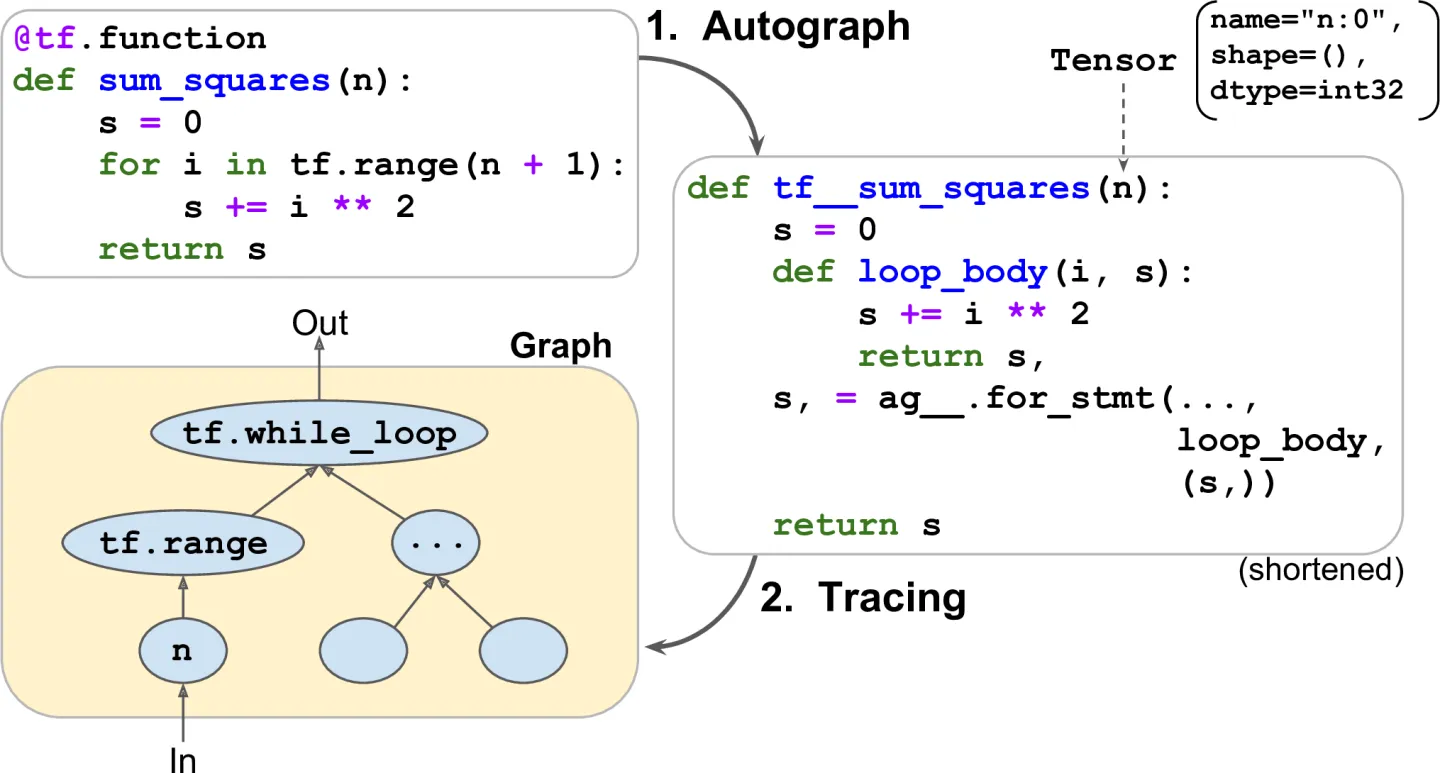

> if you call a library function tracing it will not be precent in the graph (only during tracing), tf.reduce_sum() instead of np.sum(), tf.sort() instead of sort()

> since graphs are reused, if you use np.random.rand() in a tf function tf.constant(2) and tf.constant(3) will have the same rand number, though tf.constant([2, 3]) would generate new rand nums. to combat this use tf.random.uniform([])

> tf.py_function(func) will hinder performance

> you can call other python funcs in tf funcs but they must follow the same rules "these funcs don't need to be decorated"

> if func creates a tf variable it must create it on first call. preferable to create variables outside of func and call .assign() method when you want to assign a new method to it

> source code of func must be available to tf

> tf will only capture for loops iterating over a tensor or dataset. tf.range(x) instead of range(x)

> prefer vectorized implementation instead of loops

# Custom Batch Norm

In [75]:
class CustomLayerNorm(keras.layers.Layer):
    def __init__(self, **kwargs):
        super().__init__(**kwargs)

    def build(self, batch_input_shape):
        self.a = self.add_weight(
            name="alpha", 
            shape=batch_input_shape[-1:],
            initializer="ones"
        )
        self.b = self.add_weight(
            name="beta", 
            shape=batch_input_shape[-1:],
            initializer="zeros"
        )
        super().build(batch_input_shape) # must be at the end

    def call(self, x):
        mean, stdsqr = tf.nn.moments(x, axes=-1, keepdims=True)
        e = 0.001
        return self.a * (x-mean)/tf.math.sqrt(stdsqr + e) + self.b

In [76]:
xt = xt.astype(np.float32)

custom_layer_norm = CustomLayerNorm()
keras_layer_norm = keras.layers.LayerNormalization()

tf.reduce_mean(keras.losses.mean_absolute_error(
    keras_layer_norm(xt), custom_layer_norm(xt)))

<tf.Tensor: shape=(), dtype=float32, numpy=4.4710834e-08>

In [77]:
keras_layer_norm(xt)

<tf.Tensor: shape=(11610, 8), dtype=float32, numpy=
array([[-0.2200162 ,  0.14490594, -0.21392785, ..., -0.25280067,
         0.13181978, -1.598257  ],
       [-0.34971637, -0.25619704, -0.34697118, ..., -0.34970805,
        -0.26443747, -0.69787335],
       [-0.333591  , -0.21438044, -0.32935742, ..., -0.3393128 ,
        -0.19859228, -0.83811265],
       ...,
       [-0.34184676, -0.26823527, -0.33456644, ..., -0.34276915,
        -0.23827769, -0.7427682 ],
       [-0.34394157, -0.2877065 , -0.34169042, ..., -0.34614286,
        -0.2517231 , -0.7026853 ],
       [-0.34617764, -0.20134601, -0.34158215, ..., -0.34957704,
        -0.23637672, -0.78038704]], dtype=float32)>

In [78]:
custom_layer_norm(xt)

<tf.Tensor: shape=(11610, 8), dtype=float32, numpy=
array([[-0.22001621,  0.14490595, -0.21392784, ..., -0.25280064,
         0.13181981, -1.5982571 ],
       [-0.34971637, -0.25619704, -0.34697118, ..., -0.34970802,
        -0.26443747, -0.69787335],
       [-0.33359104, -0.21438044, -0.32935742, ..., -0.3393128 ,
        -0.19859228, -0.8381127 ],
       ...,
       [-0.34184682, -0.2682353 , -0.3345665 , ..., -0.34276918,
        -0.23827773, -0.74276835],
       [-0.34394154, -0.2877065 , -0.34169042, ..., -0.34614286,
        -0.25172308, -0.7026853 ],
       [-0.34617764, -0.20134601, -0.34158215, ..., -0.34957704,
        -0.23637672, -0.78038704]], dtype=float32)>